In [2]:
from experiment import load_CIFAR10H, simulate_humans
from combiner import *
from test_Yhm import test_Yhm

In [3]:
human_counts, model_probs, y_true = load_CIFAR10H('cnn_data')
accuracies = [0.35, 0.65, 0.70, 0.56, 0.66]
y_h = simulate_humans(human_counts, y_true, accuracy_list=accuracies)

In [4]:
combiner = MAPOracleCombiner()

combiner.fit(model_probs, y_h, y_true,5)

In [5]:
import csv

def compute_cf_diff():
    diff_list = []
    count_list = []
    average_diff = []
    for i in range(len(model_probs)):
        hcm_list = combiner.confusion_matrix
        _, h_labels = test_Yhm(hcm_list, model_probs[i])
        diff = []
        ct = 0
        for h in range(len(accuracies)):
            diff.append(hcm_list[h][h_labels[h]][y_true[i]] - hcm_list[h][y_h[i][h]][y_true[i]])
            if hcm_list[h][h_labels[h]][y_true[i]] - hcm_list[h][y_h[i][h]][y_true[i]] < 0:
                ct+=1
        if ct>0:
            average_diff.append([sum(d for d in diff if d<0)/ct])
        else:
            average_diff.append([0])
        diff_list.append(diff)
        count_list.append([ct])
    with open('diff.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(diff_list)
    with open('count.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(count_list)
    with open('avg.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(average_diff)
compute_cf_diff()


In [6]:
print(len(combiner.confusion_matrix))

5


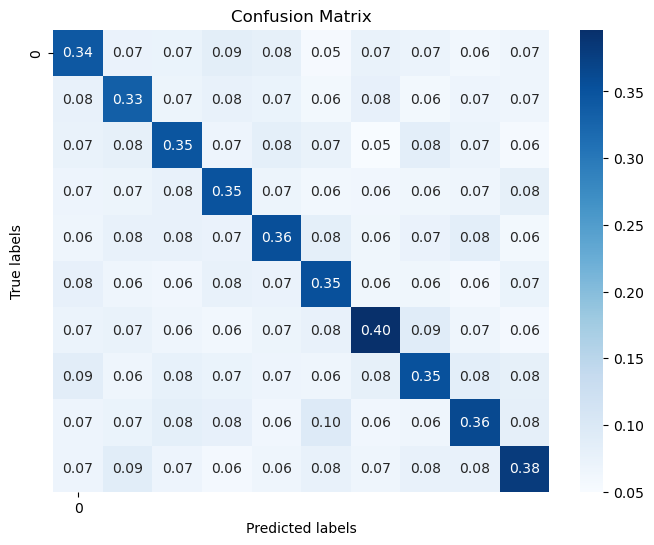

Precision: [0.34938171 0.34770413 0.3505932  0.36057989 0.35122095 0.36582096
 0.38589171 0.34154114 0.35182327 0.37097712]
Recall: [0.34346353 0.3334994  0.34744918 0.34944201 0.35542049 0.35342766
 0.39627342 0.35243125 0.36339179 0.38132722]
F1 Score: [0.34639735 0.34045367 0.34901411 0.35492359 0.35330824 0.35951753
 0.39101367 0.34690075 0.35751397 0.37608097]


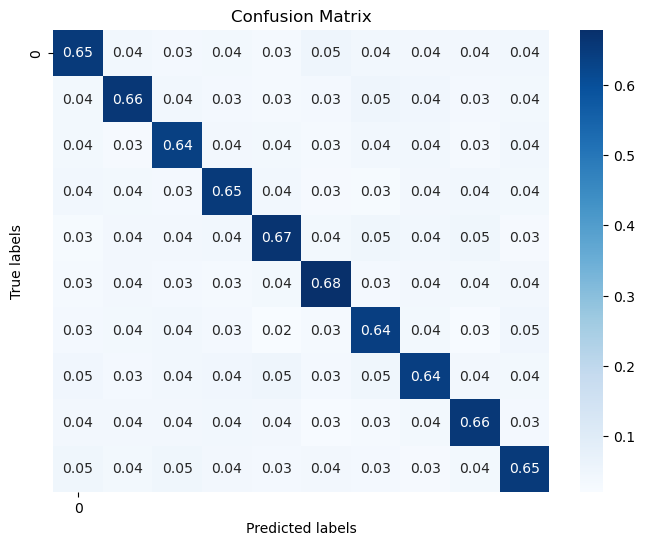

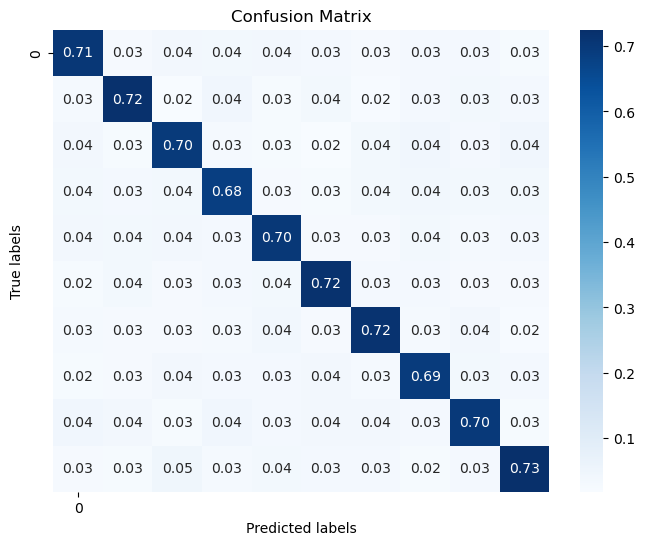

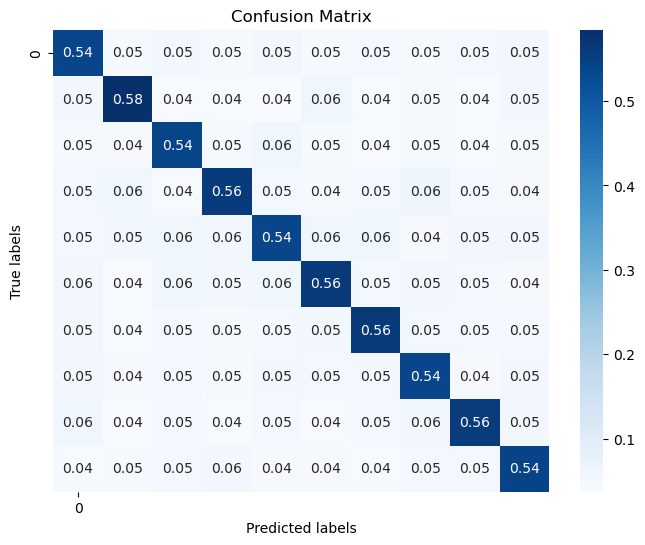

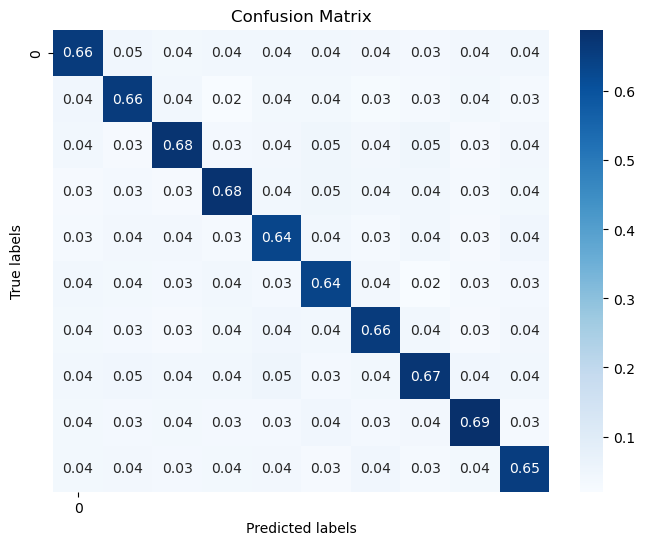

[[0.34346353 0.0738342  0.07184137 0.08579115 0.07981267 0.05490235
  0.07483061 0.07084496 0.06187724 0.06586289]
 [0.07582702 0.3334994  0.06984855 0.07682344 0.07184137 0.058888
  0.07881626 0.058888   0.06785572 0.06685931]
 [0.07483061 0.08080909 0.34744918 0.06885213 0.08280191 0.07483061
  0.04992029 0.08479474 0.07084496 0.05589876]
 [0.06785572 0.06984855 0.07682344 0.34944201 0.06984855 0.06187724
  0.06287365 0.06387007 0.06685931 0.07981267]
 [0.06486648 0.07682344 0.07682344 0.0738342  0.35542049 0.08280191
  0.06387007 0.0738342  0.08479474 0.058888  ]
 [0.07881626 0.06486648 0.06287365 0.07582702 0.0738342  0.35342766
  0.06387007 0.06387007 0.05689518 0.07184137]
 [0.07084496 0.07483061 0.06486648 0.06088083 0.06984855 0.07582702
  0.39627342 0.0897768  0.06586289 0.05789159]
 [0.08678756 0.06486648 0.07781985 0.07184137 0.06885213 0.06486648
  0.07981267 0.35243125 0.08479474 0.07981267]
 [0.06785572 0.07184137 0.08280191 0.07881626 0.06287365 0.09575528
  0.06287365 0

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, labels=None):
    """
    Plot the confusion matrix.

    Parameters:
        confusion_matrix (np.ndarray): Confusion matrix.
        labels (array-like, optional): List of labels for confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def precision(confusion_matrix):
    """
    Compute precision.

    Parameters:
        confusion_matrix (np.ndarray): Confusion matrix.

    Returns:
        float: Precision.
    """
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1_score)
    # return np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    

plot_confusion_matrix(combiner.confusion_matrix[0], labels=10)
precision(combiner.confusion_matrix[0])
plot_confusion_matrix(combiner.confusion_matrix[1], labels=10)
plot_confusion_matrix(combiner.confusion_matrix[2], labels=10)
plot_confusion_matrix(combiner.confusion_matrix[3], labels=10)
plot_confusion_matrix(combiner.confusion_matrix[4], labels=10)

print(combiner.confusion_matrix[0])


